# Advanced Machine Learning

## Assignment # 2

### Import packages

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, 
    IAAPiecewiseAffine, IAASharpen, IAAEmboss, Flip, OneOf, Compose, Rotate, ElasticTransform
)

%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


### Define functions

In [0]:
def ae_lossplot(autoencoder, n_epochs):
    loss = autoencoder.history['loss']
    val_loss = autoencoder.history['val_loss']
    epochs = range(n_epochs)
    plt.figure(figsize = (15,5))
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    
def model_plot(history):
    plt.figure(figsize = (15, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()

    plt.figure(figsize = (15, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()

### Import dei dati

In [3]:
from  google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/My\ Drive/AML\ ASSIGNMENT\ #2/

/content/drive/My Drive/AML ASSIGNMENT #2


In [0]:
x_train = pickle.load(open("x_train.obj","rb"))

x_test = pickle.load(open("x_test.obj","rb"))

y_train = pickle.load(open("y_train.obj","rb"))

Text(0.5, 1.0, '(Label: 21)')

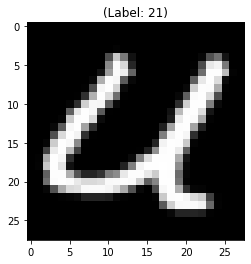

In [6]:
plt.imshow(x_train[1], cmap = "gray")
plt.title("(Label: " + str(y_train[1]) + ")")

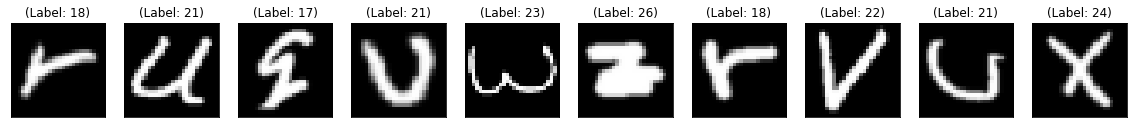

In [7]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.title("(Label: " + str(y_train[i]) + ")")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [8]:
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Test set (images) shape: {shape}".format(shape=x_test.shape))

Training set (images) shape: (14000, 28, 28)
Test set (images) shape: (8800, 28, 28)


### Preprocessing

Partiamo innanzitutto suddividendo il nostro dataset in train set e validation set

In [9]:
print("Splitting...")
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.30, random_state = 32, stratify = y_train)
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Validation set (images) shape: {shape}".format(shape=x_val.shape))

Splitting...
Training set (images) shape: (9800, 28, 28)
Validation set (images) shape: (4200, 28, 28)


Data augmentation (opzionale), si agisce sul training set per realizzare copie delle nostre immagini trasformandole in modo che risultino più irregolari, come se ci fosse più varietà nello stile di scrittura.

Training set (images) shape: (29400, 28, 28)
Test set (images) shape: (4200, 28, 28)


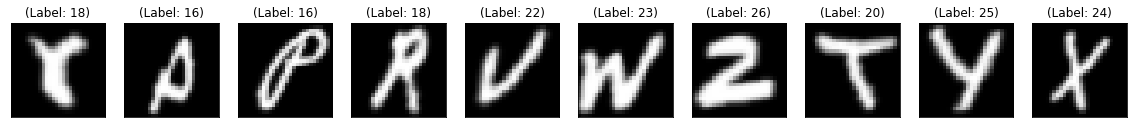

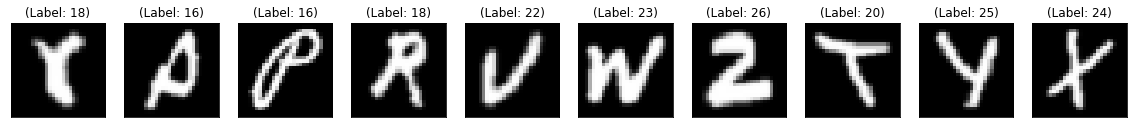

In [10]:
augmentation = True
n_t = 2

if augmentation:
  
    # add noise

#     aug = GaussNoise(p=1, var_limit=(100,1000))

#     x_train_dist = aug(image = x_train)['image']

#     n = 10 
#     plt.figure(figsize=(20, 4))
#     for i in range(n):
#         ax = plt.subplot(2, n, i + 1)
#         plt.imshow(x_train_dist[i], cmap = "gray")
#         plt.title("(Label: " + str(y_train[i]) + ")")
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

#     # add rotation

#     rot = Rotate(p=1, limit = 10, border_mode=1)

#     x_train_rot = np.zeros([1,28,28])
#     x_train_rot = [rot(image = x_train[i])['image'] for i in range(x_train.shape[0])]

#     x_train_rot = np.asarray(x_train_rot)
#     x_train_rot.shape
    
    # elastic transform
    
    et = ElasticTransform(p = 1, border_mode = 1, sigma = 10, alpha_affine=2)
    x_train_et = np.zeros([1,28,28])
    x_train_et = [et(image = x_train[i])['image'] for j in range(n_t) for i in range(x_train.shape[0])]

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_train_et[i], cmap = "gray")
        plt.title("(Label: " + str(y_train[i]) + ")")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    n = 10
    plt.figure(figsize = (20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_train[i], cmap = "gray")
        plt.title("(Label: " + str(y_train[i]) + ")")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    x_train = np.concatenate((x_train, 
                              #x_train_dist, 
                              #_train_rot
                              x_train_et
                             ),
                             axis = 0)
    
    y_train = np.concatenate([y_train for i in range(n_t+1)])
    
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Test set (images) shape: {shape}".format(shape=x_val.shape))

Check per lo splitting stratificato

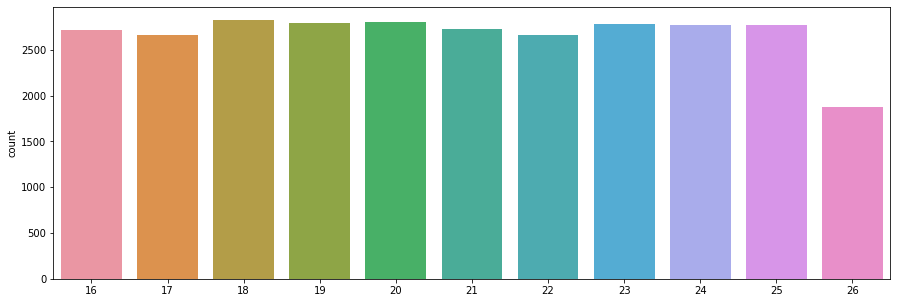

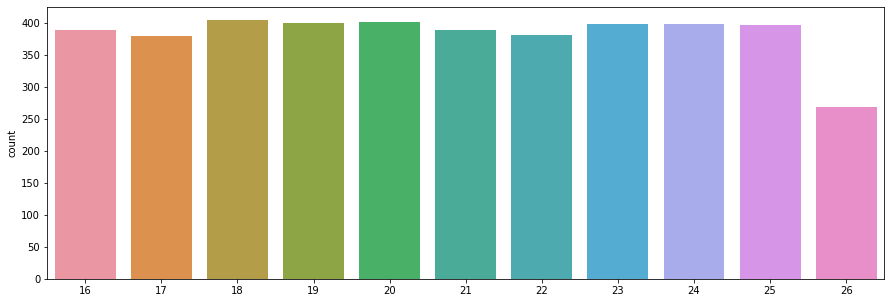

In [11]:
plt.figure(figsize = (15,5))
sns.countplot(y_train)
plt.show()
plt.figure(figsize = (15,5))
sns.countplot(y_val)
plt.show()

In [12]:
np.max(x_train), np.max(x_val)

(255, 255)

Innanzitutto riscaliamo i nostri pixel così da ricondurli da [0,255] a [0,1]

In [13]:
print("Rescaling...")
x_train = x_train.astype('float32')/np.max(x_train)
x_val = x_val.astype('float32')/np.max(x_val)
print(np.max(x_train), np.max(x_val))
print("Done")

Rescaling...
1.0 1.0
Done


Successivamente riorganizziamo i dati relativi ad ogni immagine in un unica matrice 28x28 = 784 per poter passare i nostri dati alla rete

In [14]:
print("Reshaping...")
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
print("Training set (images) shape: {shape}".format(shape = x_train.shape))
print("Validation set (images) shape: {shape}".format(shape = x_val.shape))

Reshaping...
Training set (images) shape: (29400, 784)
Validation set (images) shape: (4200, 784)


Infine convertiamo la nostra y in vettori one-hot encoded

In [15]:
train_y_one_hot = to_categorical(y_train-16)
val_y_one_hot = to_categorical(y_val-16)

print('Original label:', y_train[0])
print('After conversion to one-hot:', train_y_one_hot[0])

Original label: 18
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Classification model (FC)

In [16]:
input_img = Input(shape = (784,), name = "main_input")
num_classes = 11

def init_model(input_img):
    x = Dense(512, activation = 'relu', name = 'first_layer', kernel_regularizer=l1(1e-05))(input_img)
    x = Dropout(rate = .4, name = 'first_dropout')(x)
    x = Dense(256, activation = 'relu', name = 'second_layer')(x)
    x = Dropout(rate = .4, name = 'second_dropout')(x)
    x = Dense(128, activation = 'relu', name = 'third_layer')(x)
    x = Dropout(rate = .4, name = 'third_dropout')(x)
    out = Dense(num_classes, activation = 'softmax', name = 'output_layer')(x)
    return out

model = Model(input_img, init_model(input_img))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 784)               0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
first_dropout (Dropout)      (None, 512)               0         
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
second_dropout (Dropout)     (None, 256)               0         
_________________________________________________________________
third_layer (Dense)          (None, 128)               32896     
____

In [17]:
model_train = model.fit(x_train, train_y_one_hot,
                        epochs = 20,
                        batch_size = 1024,
                        shuffle = True,
                        verbose = 1,
                        validation_data = (x_val, val_y_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 29400 samples, validate on 4200 samples
Epoch 1/20





29400/29400 [==============================] - 5s 171us/step - loss: 1.7834 - acc: 0.4488 - val_loss: 0.8647 - val_acc: 0.7821
Epoch 2/20
29400/29400 [==============================] - 0s 12us/step - loss: 1.0690 - acc: 0.7039 - val_loss: 0.6021 - val_acc: 0.8569
Epoch 3/20
29400/29400 [==============================] - 0s 12us/step - loss: 0.8073 - acc: 0.7891 - val_loss: 0.4598 - val_acc: 0.9012
Epoch 4/20
29400/29400 [==============================] - 0s 12us/step - loss: 0.6632 - acc: 0.8339 - val_loss: 0.3930 - val_acc: 0.9174
Epoch 5/20
29400/29400 [==============================] - 0s 12us/step - loss: 0.5659 - acc: 0.8633 - val_loss: 0.3528 - val_acc: 0.9286
Epoch 6/20
29400/29400 [==============================] - 0s 12us/step - loss: 0.4959 - acc: 0.8843 - val_loss: 0.3358 - val_acc: 0.9333
Epoch 7/20
29400/29400 [==

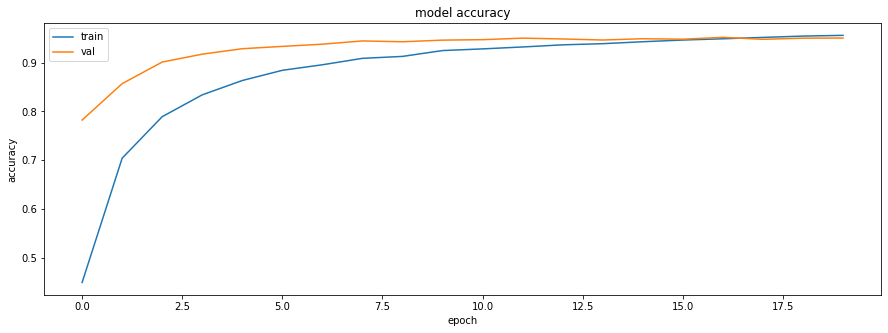

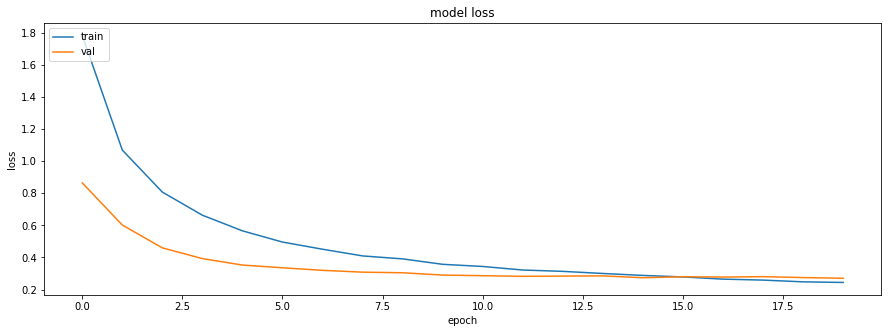

              precision    recall  f1-score   support

          16       0.96      0.95      0.95       388
          17       0.93      0.94      0.94       379
          18       0.92      0.94      0.93       404
          19       0.97      0.97      0.97       399
          20       0.98      0.96      0.97       401
          21       0.93      0.95      0.94       389
          22       0.91      0.93      0.92       381
          23       0.98      0.98      0.98       398
          24       0.98      0.96      0.97       397
          25       0.94      0.91      0.92       396
          26       0.96      0.98      0.97       268

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



In [18]:
model_plot(model_train)

predicted = model.predict(x_val)
y_pred = np.argmax(predicted, axis = 1)

print(classification_report(y_val, y_pred+16))

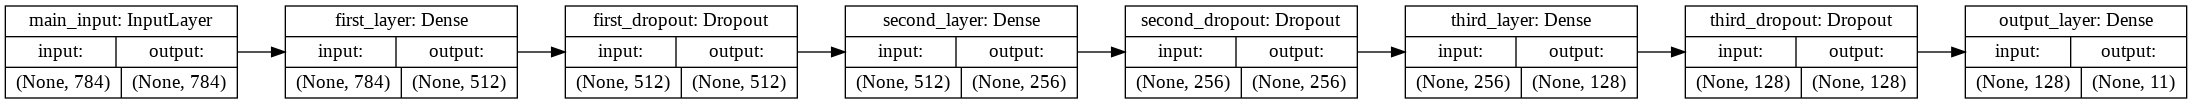

In [0]:
plot_model(model, show_shapes=True, rankdir="LR")

### Autoencoder reconstruction (FC)

In [19]:
encoding_dim = 64
input_img = Input(shape=(784,), name = 'main_input')

# encode
def encoder(input_img):
    x = Dense(512, activation = 'relu', name = 'first_enc')(input_img)
    x = Dense(512, activation = 'relu', name = 'second_enc')(x)
    x = Dense(256, activation = 'relu', name = 'third_enc')(x)
    x = Dense(128, activation = 'relu', name= 'fourth_enc')(x)
    encoded = Dense(encoding_dim, activation='relu'#,activity_regularizer = regularizers.l1(1e-7)
                    , name = 'encoded')(x)
    return encoded


#decode
def decoder(encoded):
    y = Dense(128, activation = 'relu', name = 'first_decode')(encoded)
    y = Dense(256, activation = 'relu', name  ='second_decode')(y)
    y = Dense(512, activation = 'relu', name  ='third_decode')(y)
    y = Dense(512, activation = 'relu', name = 'fourth_decode')(y)
    decoded = Dense(784, activation='sigmoid', name = 'decoded')(y)
    return decoded

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 784)               0         
_________________________________________________________________
first_enc (Dense)            (None, 512)               401920    
_________________________________________________________________
second_enc (Dense)           (None, 512)               262656    
_________________________________________________________________
third_enc (Dense)            (None, 256)               131328    
_________________________________________________________________
fourth_enc (Dense)           (None, 128)               32896     
_________________________________________________________________
encoded (Dense)              (None, 64)                8256      
_________________________________________________________________
first_decode (Dense)         (None, 128)               8320

In [20]:
autoencoder_train = autoencoder.fit(x_train, x_train,
                                    epochs = 500,
                                    batch_size = 1024,
                                    shuffle = True,
                                    verbose = 1,
                                    validation_data = (x_val, x_val))

Train on 29400 samples, validate on 4200 samples
Epoch 1/500
29400/29400 [==============================] - 1s 51us/step - loss: 0.4461 - val_loss: 0.3545
Epoch 2/500
29400/29400 [==============================] - 1s 24us/step - loss: 0.3591 - val_loss: 0.3459
Epoch 3/500
29400/29400 [==============================] - 1s 24us/step - loss: 0.3541 - val_loss: 0.3416
Epoch 4/500
29400/29400 [==============================] - 1s 23us/step - loss: 0.3394 - val_loss: 0.3095
Epoch 5/500
29400/29400 [==============================] - 1s 22us/step - loss: 0.3125 - val_loss: 0.2857
Epoch 6/500
29400/29400 [==============================] - 1s 22us/step - loss: 0.2908 - val_loss: 0.2658
Epoch 7/500
29400/29400 [==============================] - 1s 22us/step - loss: 0.2726 - val_loss: 0.2508
Epoch 8/500
29400/29400 [==============================] - 1s 22us/step - loss: 0.2613 - val_loss: 0.2410
Epoch 9/500
29400/29400 [==============================] - 1s 23us/step - loss: 0.2514 - val_loss: 0.22

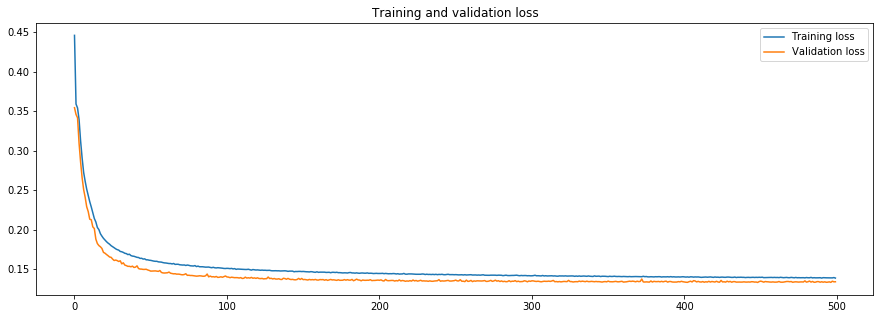

In [21]:
ae_lossplot(autoencoder_train, 500)

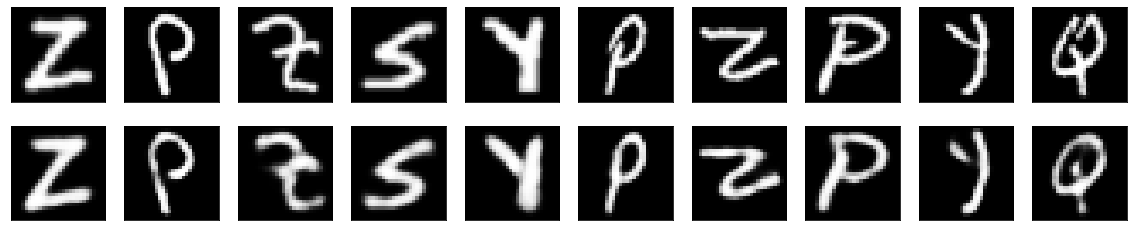

In [22]:
decoded_imgs = autoencoder.predict(x_val)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder.save_weights('autoencoder.h5')

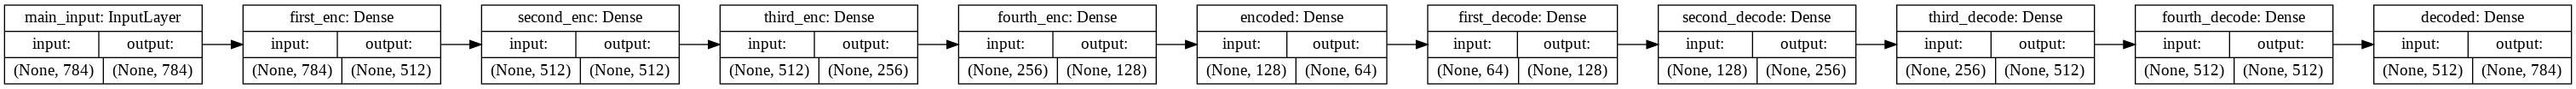

In [0]:
plot_model(autoencoder, show_shapes=True, rankdir="LR")

### (Optional) Classification starting from encoded layer

In [0]:
def fc(enco):
  x = Dense(512, activation = 'relu', name = 'first_layer')(enco)
  x = Dropout(rate = .4, name = 'first_dropout')(x)
  x = Dense(256, activation = 'relu', name = 'second_layer')(x)
  x = Dropout(rate = .4, name = 'second_dropout')(x)
  x = Dense(128, activation = 'relu', name = 'third_layer')(x)
  x = Dropout(rate = .4, name = 'third_dropout')(x)
  out = Dense(num_classes, activation = 'softmax', name = 'output_layer')(x)
  return out

In [0]:
encode = encoder(input_img)
full_model = Model(input_img, fc(encode))

In [0]:
for l1,l2 in zip(full_model.layers[:6], autoencoder.layers[0:6]):
    l1.set_weights(l2.get_weights())

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False

In [0]:
full_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['acc'])

In [28]:
full_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 784)               0         
_________________________________________________________________
first_enc (Dense)            (None, 512)               401920    
_________________________________________________________________
second_enc (Dense)           (None, 512)               262656    
_________________________________________________________________
third_enc (Dense)            (None, 256)               131328    
_________________________________________________________________
fourth_enc (Dense)           (None, 128)               32896     
_________________________________________________________________
encoded (Dense)              (None, 64)                8256      
_________________________________________________________________
first_layer (Dense)          (None, 512)               3328

In [0]:
classify_train = full_model.fit(x_train, train_y_one_hot, 
                                batch_size = 512, epochs = 100,
                                verbose = 0, validation_data=(x_val, val_y_one_hot))

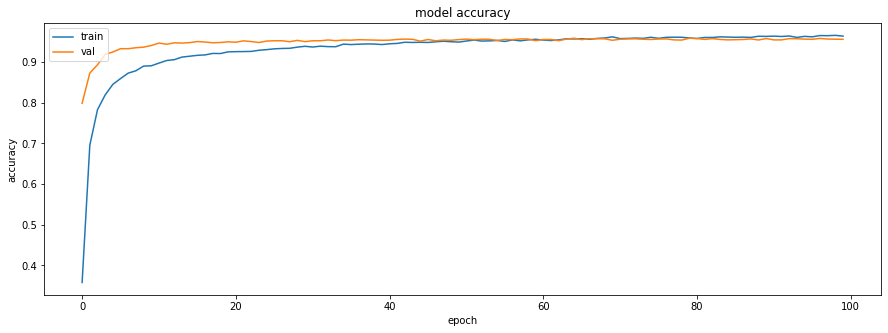

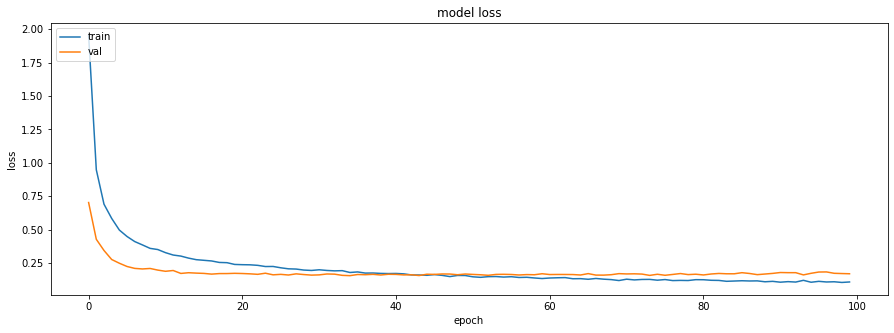

In [30]:
model_plot(classify_train)

In [31]:
predicted = full_model.predict(x_val)
y_pred = np.argmax(predicted, axis=1)

print(classification_report(y_val, y_pred+16))

              precision    recall  f1-score   support

          16       0.97      0.96      0.97       388
          17       0.94      0.94      0.94       379
          18       0.93      0.96      0.95       404
          19       0.98      0.98      0.98       399
          20       0.97      0.98      0.97       401
          21       0.94      0.93      0.93       389
          22       0.91      0.93      0.92       381
          23       0.97      0.98      0.98       398
          24       0.98      0.96      0.97       397
          25       0.96      0.91      0.93       396
          26       0.96      0.99      0.97       268

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



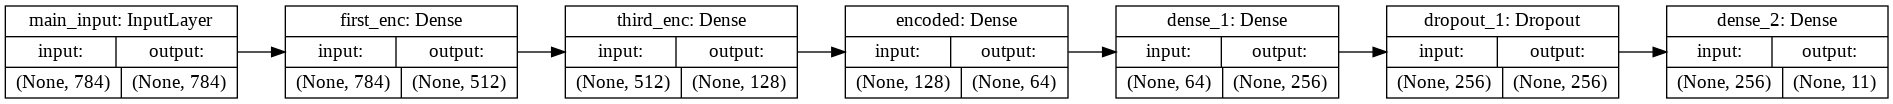

In [0]:
plot_model(full_model, show_shapes=True, rankdir="LR")

### Prediction on test set

In [33]:
print("Original test set shape: {shape}".format(shape = x_test.shape))

Original test set shape: (8800, 28, 28)


In [34]:
print("Preprocessing test set...")
x_test = x_test.astype('float32')/np.max(x_test)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("Test set shape: {shape} with range {min},{max}".format(shape = x_test.shape, min = np.min(x_test), max = np.max(x_test)))

Preprocessing test set...
Test set shape: (8800, 784) with range 0.0,1.0


In [0]:
predictions = full_model.predict(x_test)
y_test_pred = np.argmax(predictions, axis=1)
y_test_pred =  y_test_pred+16

In [0]:
with open("Fabrizio_D'Intinosante_838866_score2.txt", "w") as f:
  for prediction in y_test_pred:
    f.write(str(prediction)+"\n")